In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from pyESN import ESN 

import RSI as rsi
import CPM as cpm
import importlib
import MovingAverage as ma
import Stochastic as st
importlib.reload(ma)
importlib.reload(cpm)
importlib.reload(st)
importlib.reload(rsi)

<module 'RSI' from '/Users/munminjung/Capstone/RSI.py'>

In [2]:
name = 'JNJ' #Johnson & Johnson
ticker = yf.Ticker(name)
ori_df = ticker.history(interval='1d', period='10y', auto_adjust=False)

In [3]:
ori_df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

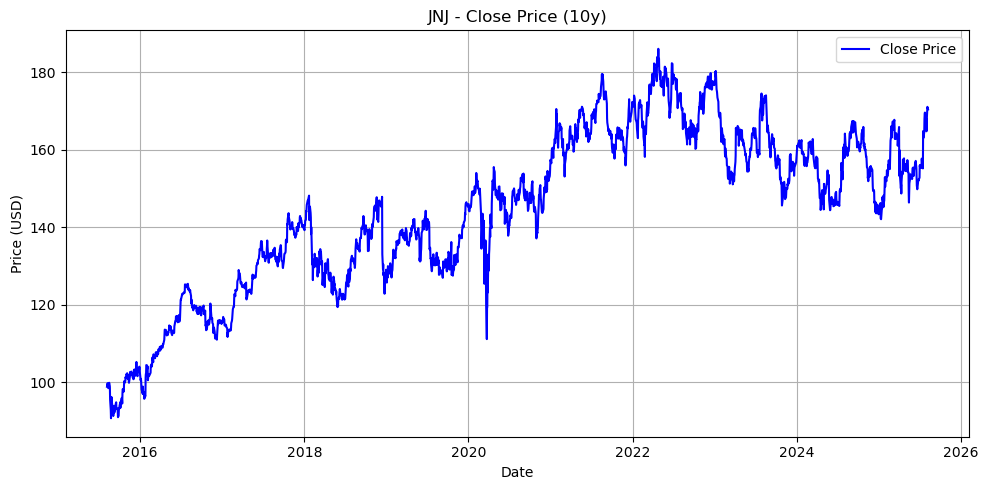

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(ori_df.index, ori_df['Close'], label='Close Price', color='blue')
plt.title(f'{name} - Close Price (10y)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
df = ori_df.copy()

In [6]:
cpm_points, df_with_cpm = cpm.cpm_model(df, column='Close',P=0.09, T=5)

In [7]:
df_with_cpm.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,is_cpm_point,cpm_point_type
Date,,,,,,,,,,
2015-08-07 00:00:00-04:00,99.019997,99.070000,98.160004,98.849998,74.838852,6027900,0.0,0.0,True,0
2015-08-10 00:00:00-04:00,99.570000,100.059998,99.449997,99.790001,75.550499,6133500,0.0,0.0,False,0
2015-08-11 00:00:00-04:00,99.050003,99.339996,98.769997,99.010002,74.959969,6682600,0.0,0.0,False,0
2015-08-12 00:00:00-04:00,98.400002,98.730003,97.410004,98.709999,74.732872,7462400,0.0,0.0,False,0
2015-08-13 00:00:00-04:00,98.739998,98.980003,98.150002,98.480003,74.558716,5048000,0.0,0.0,False,0


In [8]:
len(cpm_points)

717

In [9]:
df_with_cpm['cpm_point_type'].describe()

count    2515.000000
mean        0.003579
std         0.533287
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: cpm_point_type, dtype: float64

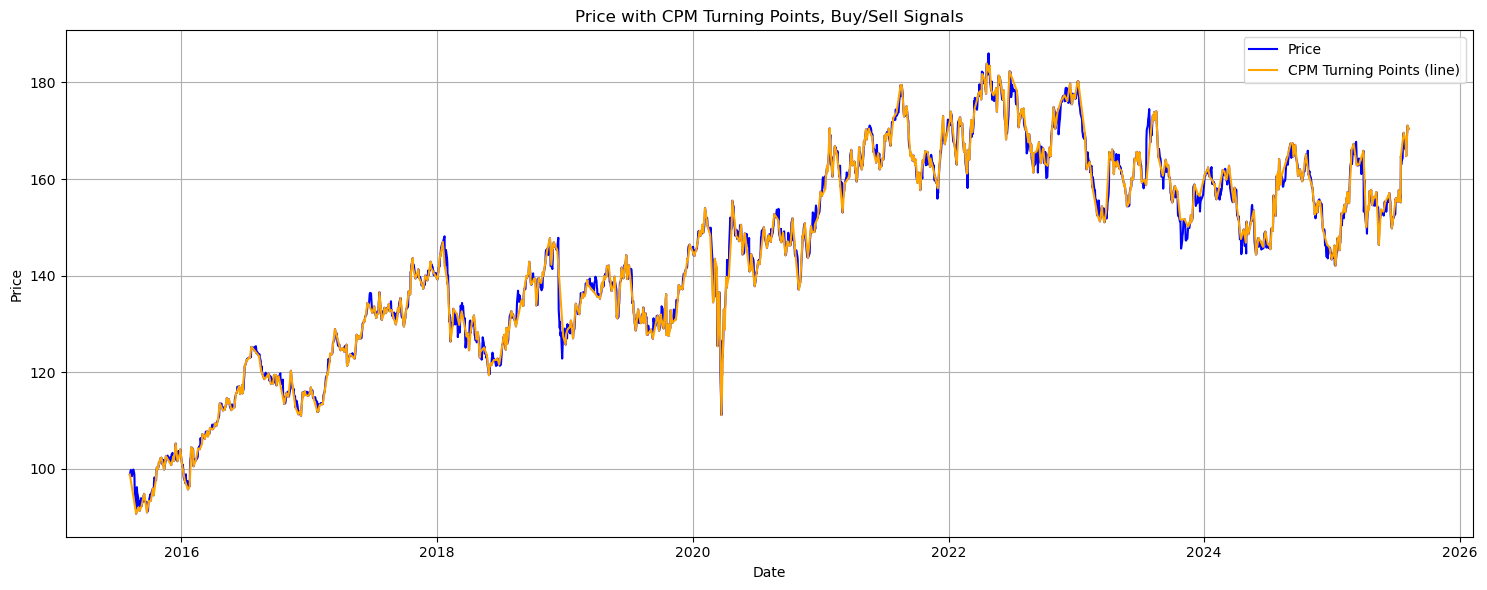

In [10]:
# CPM 신호가 있는 인덱스와 가격
cpm_indices = df_with_cpm[df_with_cpm['is_cpm_point'] == True].index
cpm_prices = df_with_cpm.loc[cpm_indices, 'Close']

# Buy (1) / Sell (-1) 인덱스와 가격
buy_indices = df_with_cpm[df_with_cpm['cpm_point_type'] == 1].index
sell_indices = df_with_cpm[df_with_cpm['cpm_point_type'] == -1].index
buy_prices = df_with_cpm.loc[buy_indices, 'Close']
sell_prices = df_with_cpm.loc[sell_indices, 'Close']

plt.figure(figsize=(15, 6))

# 1. 전체 가격 라인
plt.plot(df.index, df_with_cpm['Close'], label='Price', color='blue')

# 2. CPM 전환점을 선으로 연결
plt.plot(cpm_indices, cpm_prices, label='CPM Turning Points (line)', color='orange')

# 3. Buy 시점 (▲ 초록색)
#plt.scatter(buy_indices, buy_prices, label='Buy Signal', marker='^', color='green', s=100)

# 4. Sell 시점 (▼ 빨간색)
#plt.scatter(sell_indices, sell_prices, label='Sell Signal', marker='v', color='red', s=100)

plt.title("Price with CPM Turning Points, Buy/Sell Signals")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
if not isinstance(df_with_cpm.index, pd.DatetimeIndex):
    df_with_cpm.index = pd.to_datetime(df_with_cpm.index)
if df_with_cpm.index.tz is not None:
    df_with_cpm.index = df_with_cpm.index.tz_localize(None)
df_with_cpm.index = df_with_cpm.index.normalize()

In [12]:
total_len = len(df)

# # 6:2:2
# train_end = int(total_len * 0.6)
# val_end = int(total_len * 0.8)

# train_df = df.iloc[:train_end]
# val_df = df.iloc[train_end:val_end]
# test_df = df.iloc[val_end:]

train_end = int(total_len * 0.7)
train_df = df_with_cpm.iloc[:train_end]
test_df = df_with_cpm.iloc[train_end:]

In [13]:
st_best_params, st_best_fitness, train_df = st.run_stochastic_ga_optimization(train_df)

print("Best Parameters:", st_best_params)
print("Best Fitness:", st_best_fitness)

유전 알고리즘 실행 중...


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

gen	nevals	avg    	min  	max   
0  	50    	861.278	822.7	886.52


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

1  	38    	inf    	828.91	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

2  	41    	inf    	827.85	inf   
3  	35    	inf    	824.41	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

4  	41    	inf    	818.89	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

5  	32    	inf    	818.89	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

6  	40    	inf    	814.69	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

7  	40    	inf    	814.69	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

8  	39    	inf    	814.69	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

9  	36    	inf    	814.69	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

10 	43    	inf    	814.34	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

11 	37    	817.112	814.34	825.05


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

12 	42    	inf    	814.34	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

13 	42    	inf    	814.34	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

14 	40    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

15 	34    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

16 	37    	814.59 	813.29	817.65


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

17 	44    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

18 	34    	814.344	813.29	815.89


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

19 	45    	814.539	813.29	829.98


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

20 	35    	814.278	813.29	819.16


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

21 	39    	814.13 	813.29	817.45


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

22 	40    	813.723	813.29	815.16


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

23 	40    	814.027	813.29	831.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

24 	34    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

25 	43    	813.465	813.29	814.44


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

26 	46    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

27 	40    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

28 	32    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

29 	38    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

30 	37    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

31 	41    	813.691	813.29	828.61


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

32 	40    	814.083	813.29	831.63
33 	28    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

34 	39    	814.55 	813.29	833.15


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

35 	39    	813.638	813.29	828.81


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

36 	38    	814.118	813.29	836.43


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

37 	36    	inf    	813.29	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

38 	44    	813.307	813.02	814.47


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

39 	38    	813.412	813.02	815.09


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

40 	41    	813.747	813.02	817.5 


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

41 	41    	inf    	813.02	inf   
42 	23    	813.692	813.02	817.5 


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

43 	32    	inf    	812.9 	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

44 	36    	inf    	812.9 	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

45 	39    	813.255	812.9 	817.45


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

46 	41    	813.887	812.9 	841.53


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

47 	34    	813.113	812.9 	815.78


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

48 	37    	813.117	812.9 	817.45
49 	27    	814.189	812.9 	841.69


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

50 	32    	813.617	812.9 	843.21

--- 유전 알고리즘 결과 ---
최적의 파라미터 (n, a, b, c, d): [5.414158840041228, 44.27547280927088, 5.886080733533536, 91.54058374436612, 0.6494387787702003]
최소 적합도: 812.8998565673828
Best Parameters: [5.414158840041228, 44.27547280927088, 5.886080733533536, 91.54058374436612, 0.6494387787702003]
Best Fitness: 812.8998565673828


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

In [14]:
n, a, b, c, d = st_best_params

In [15]:
test_st_signals = st.generate_stochastic_signals(test_df, n, a, b, c, d)

In [16]:
signal_map = test_st_signals.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
test_df['ST_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)

/var/folders/0h/kkd934jd32d8mv06gwr4ct0r0000gn/T/ipykernel_27208/1151066698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ST_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)


In [17]:
ma_best_params, ma_best_fitness, train_df = ma.run_MA_ga_optimization(train_df)

print("Best Parameters:", ma_best_params)
print("Best Fitness:", ma_best_fitness)

이동평균 유전 알고리즘 실행 중...


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

gen	nevals	avg    	min   	max   
0  	50    	853.132	825.08	928.44


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

1  	33    	842.552	815.84	871.21


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

2  	44    	844.714	816.79	908.76


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

3  	36    	inf    	816.79	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

4  	41    	838.815	814.43	870.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

5  	43    	840.675	814.4 	890.49


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

6  	36    	836.409	813.85	869.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

7  	45    	836.844	814.4 	878.26


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

8  	37    	833.182	815.4 	867.58


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

9  	39    	835.198	814.06	881.86


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

10 	43    	831.972	814.06	857.24


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

11 	37    	829.598	813.4 	885.28


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

12 	36    	825.432	813.4 	865.09


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

13 	42    	822    	813.4 	838.89


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

14 	43    	820.431	813.4 	843.68


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

15 	35    	818.424	813.37	840.59


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

16 	35    	817.047	811.97	829.63


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

17 	42    	816.55 	812.37	831.07


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

18 	44    	816.084	811.97	835.11


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

19 	36    	814.288	810.65	822.55


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

20 	43    	814.57 	811.49	821.73


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

21 	38    	814.126	811.01	830.87


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

22 	42    	813.879	810.67	823.88


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

23 	28    	812.653	810.67	822.46


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

24 	40    	812.683	809.81	837.47


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

25 	40    	813.918	809.81	841.04


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

26 	35    	812.511	809.81	833.51


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

27 	40    	811.659	809.81	833.03


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

28 	40    	811.25 	809.81	829.02


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

29 	40    	811.395	809.81	832.3 


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

30 	39    	810.5  	809.81	816.97


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

31 	37    	811.071	809.81	825.65


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

32 	39    	810.72 	809.81	833.92


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

33 	33    	810.816	809.81	835.88


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

34 	42    	810.367	809.81	819.3 


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

35 	40    	810.361	809.81	815.06


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

36 	34    	811.001	809.81	834.38


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

37 	39    	811.021	809.81	834.19


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

38 	36    	810.093	809.81	815.06


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

39 	42    	810.498	809.81	823.03


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

40 	35    	810.95 	809.81	833.05


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

41 	35    	810.324	809.81	825.14


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

42 	36    	810.56 	809.81	815.65


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

43 	33    	810.74 	809.81	826.33


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

44 	35    	810.655	809.81	819.61


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

45 	36    	810.137	809.81	815.76


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

46 	35    	810.838	809.81	830.35


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

47 	41    	810.623	809.81	826.33


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

48 	38    	810.451	809.81	830.38


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

49 	40    	809.975	809.81	815.76


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

50 	39    	810.583	809.81	815.06
빈 데이터프레임 반환
빈 데이터프레임 반환

--- 이동평균 유전 알고리즘 결과 ---
최적의 파라미터 (N, n, a, b, c): [96.63389104175981, 28.923176131322574, 2.4885005733016654, 0.4104627911987154, 1.1085687188265483]
최소 적합도: 809.8099136352539
Best Parameters: [96.63389104175981, 28.923176131322574, 2.4885005733016654, 0.4104627911987154, 1.1085687188265483]
Best Fitness: 809.8099136352539


In [18]:
N, n, a, b, c = ma_best_params

In [19]:
test_ma_signals = ma.generate_MA_signals(test_df, N, n, a, b, c)

In [20]:
signal_map = test_ma_signals.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
test_df['MA_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)

/var/folders/0h/kkd934jd32d8mv06gwr4ct0r0000gn/T/ipykernel_27208/4009268628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['MA_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)


In [21]:
len(train_df['Close'])

1760

In [22]:
rsi_best_params, rsi_best_fitness, train_df = rsi.run_RSI_ga_optimization(train_df)

print("Best Parameters:", ma_best_params)
print("Best Fitness:", ma_best_fitness)

RSI 유전 알고리즘 실행 중...


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

gen	nevals	avg    	min   	max   
0  	50    	844.709	833.77	845.53


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

1  	39    	inf    	828.41	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

2  	39    	inf    	823.47	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

3  	39    	inf    	828.41	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

4  	34    	inf    	819.6 	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

5  	33    	inf    	809.59	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

6  	34    	inf    	811.1 	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

7  	46    	inf    	806.95	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

8  	46    	inf    	805.88	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

9  	40    	inf    	802.45	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

10 	36    	inf    	796.56	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

11 	41    	inf    	785.6 	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

12 	44    	inf    	785.36	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

13 	32    	inf    	789.17	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

14 	37    	inf    	785.55	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

15 	32    	inf    	783.68	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

16 	41    	inf    	784.08	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

17 	41    	795.257	775.61	821.57


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

18 	44    	inf    	775.61	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

19 	39    	794.61 	775.61	821.77


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

20 	39    	790.201	775.61	821.81


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

21 	37    	789.297	775.61	821.81


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

22 	42    	791.661	776.5 	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

23 	30    	791.796	776.5 	823.38


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

24 	42    	inf    	776.04	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

25 	34    	792.708	775.6 	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

26 	34    	791.32 	775.61	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

27 	39    	788.095	775.75	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

28 	31    	786.758	775.75	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

29 	39    	785.404	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

30 	36    	788.544	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

31 	42    	789.784	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

32 	36    	793.3  	774.4 	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

33 	41    	791.717	774.39	828.87


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

34 	33    	inf    	774.4 	inf   


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

35 	39    	788.789	774.4 	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

36 	38    	788.858	774.4 	830.31


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

37 	36    	785.834	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

38 	39    	783.456	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

39 	36    	784.267	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

40 	36    	783.27 	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

41 	32    	784.054	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

42 	36    	786.503	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

43 	44    	786.703	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

44 	37    	778.229	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

45 	22    	781.131	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

46 	40    	782.107	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

47 	39    	786.925	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

48 	37    	783.794	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

49 	42    	784.985	774.39	822.54


/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['position'] = data['position'].replace(0, method='ffill').fillna(0)
/Users/munminjung/Capstone/eval_signal1.py:94: FutureWarning: The 'method' k

50 	38    	inf    	774.39	inf   
1760 18
1760 24
1760 8
1760 7
0 < oversold_level < overbought_level < 100
0 < oversold_level < overbought_level < 100
0 < oversold_level < overbought_level < 100
1760 19
1760 30
1760 11
1760 13
1760 19
1760 11
p >= 0
1760 13
p >= 0
1760 5
1760 17
1760 7
1760 6
1760 8
1760 4
1760 7
1760 4
1760 5
1760 10
1760 5
1760 5
1760 4
1760 4
1760 3
1760 2
1760 5
1760 2
1760 5
1760 3
1760 2
1760 5
1760 4
1760 2
p >= 0
1760 5
1760 4
1760 2
1760 2
1760 3
1760 4
1760 2
1760 2
1760 2
x < 2
1760 2
1760 5
1760 4
1760 2
x < 2
1760 2
1760 2
1760 2
1760 2
x < 2
1760 5
1760 2
1760 2
1760 2
1760 2
1760 5
1760 5
1760 5
1760 2
1760 5
1760 5
1760 2
1760 2
1760 2
1760 2
1760 2
1760 2
1760 2
1760 5
1760 2
1760 2
1760 2
1760 2
1760 5
1760 2
1760 2
1760 5
1760 2
1760 5
1760 2
1760 5
1760 2
1760 5
1760 2
1760 3
1760 2
1760 2
1760 2
1760 2
1760 2
1760 5
1760 2
1760 5
1760 2
1760 2
1760 2
1760 2
1760 2
1760 2
1760 2
1760 2
1760 2
1760 5
1760 2
1760 2
1760 5
1760 2
1760 5
1760 5
1760 5
1

In [23]:
x, overbought_level, oversold_level, p, q = rsi_best_params

In [24]:
test_rsi_signals = rsi.generate_RSI_signals(test_df, x, overbought_level, oversold_level, p, q)

755 2.8462841241729495


In [25]:
signal_map = test_rsi_signals.set_index('Index')['Type'].map({'BUY': -1, 'SELL': 1})
test_df['RSI_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)

/var/folders/0h/kkd934jd32d8mv06gwr4ct0r0000gn/T/ipykernel_27208/1229919477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['RSI_Signals'] = signal_map.reindex(test_df.index).fillna(0).astype(int)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
def esn_signals(train_df: pd.DataFrame, test_df: pd.DataFrame, Technical_Signals,
                n_reservoir: int = 200, spectral_radius: float = 0.95, sparsity: float = 0.1,
                signal_threshold: float = 0.5, random_state: int = 42):
    """
    ESN 모델을 학습하고 매수/매도 신호를 생성합니다.

    Args:
        train_df (pd.DataFrame): ESN 학습에 사용할 학습 데이터 (MA_Signals 포함).
        test_df (pd.DataFrame): ESN이 신호를 생성할 테스트 데이터 (MA_Signals 포함).
                                백테스팅의 실제 기간 데이터와 일치해야 합니다.
        n_reservoir (int): ESN의 Reservoir 크기.
        spectral_radius (float): Reservoir의 Spectral Radius.
        sparsity (float): Reservoir의 희소성.
        signal_threshold (float): ESN 예측값을 신호로 변환할 임계값.
        random_state (int): 난수 시드.

    Returns:
        pd.DataFrame: ESN 모델이 test_df에 대해 생성한 매수/매도 신호 DataFrame.
                      'Index', 'Close', 'Type' 컬럼을 포함합니다.
        dict: ESN 모델의 테스트 셋 예측 정확도 및 분류 리포트.
    """

    # 1. 학습 데이터 준비
    # ESN 입력 피처 (X)
    features = Technical_Signals + ['Close']

    # ESN 학습 목표 (Y) - 다음 날의 cpm_point_type을 예측
    train_df_copy = train_df.copy()
    train_df_copy['Target_cpm_point_type'] = train_df_copy['cpm_point_type'].shift(-1)

    # ESN 학습에 사용할 데이터셋 준비 (NaN 값 제거)
    df_esn_train = train_df_copy.dropna(subset=features + ['Target_cpm_point_type'])

    if df_esn_train.empty:
        print("ESN 학습을 위한 유효한 데이터가 부족합니다 (train_df).")
        return pd.DataFrame(columns=['Index', 'Close', 'Type']), {}

    X_train_raw = df_esn_train[features].values
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train_raw)

    # X_train = df_esn_train[features].values
    y_train = df_esn_train['Target_cpm_point_type'].values.astype(float)

    # 2. ESN 모델 초기화 및 학습
    n_inputs = X_train.shape[1]
    n_outputs = 1 # cpm_point_type을 예측하는 단일 연속 값 출력

    esn_model = ESN(n_inputs=n_inputs, n_outputs=n_outputs, n_reservoir=n_reservoir,
                    spectral_radius=spectral_radius, sparsity=sparsity,
                    input_scaling=1.0, # MA_Signals가 -1,0,1 이므로 1.0으로 둡니다.
                    teacher_scaling=1.0, # 목표도 -1,0,1 이므로 1.0으로 둡니다.
                    teacher_shift=0.0,
                    random_state=random_state, silent=False)

    esn_model.fit(X_train, y_train)
    print("\nESN 모델 학습 완료.")

    # 3. 테스트 데이터 준비 및 예측
    test_df_copy = test_df.copy()
    test_df_copy['Target_cpm_point_type'] = test_df_copy['cpm_point_type'].shift(-1)

    df_esn_test = test_df_copy.dropna(subset=features + ['Target_cpm_point_type'])

    if df_esn_test.empty:
        print("ESN 예측을 위한 유효한 데이터가 부족합니다 (test_df).")
        return pd.DataFrame(columns=['Index', 'Close', 'Type']), {}

    X_test_raw = df_esn_test[features].values
    X_test = scaler.transform(X_test_raw)

    # X_test = df_esn_test[features].values
    y_test = df_esn_test['Target_cpm_point_type'].values.astype(float)

    # 테스트 데이터의 원래 인덱스 및 종가 저장 (백테스팅에 필요)
    test_indices = df_esn_test.index
    test_close_prices = df_esn_test['Close']

    # ESN 모델로 테스트 데이터에 대한 예측
    esn_predictions = esn_model.predict(X_test, continuation=False)
    esn_predictions = esn_predictions.flatten()

    # 4. 예측값을 매수/매도 신호로 변환
    esn_signals_df = pd.DataFrame(index=test_indices)
    esn_signals_df['Prediction'] = esn_predictions
    esn_signals_df['Close'] = test_close_prices

    # 예측값에 따라 신호 결정
    esn_signals_df['Type_Num'] = 0 # 기본값 HOLD
    esn_signals_df.loc[esn_signals_df['Prediction'] > signal_threshold, 'Type_Num'] = 1 # SELL
    esn_signals_df.loc[esn_signals_df['Prediction'] < -signal_threshold, 'Type_Num'] = -1 # BUY

    esn_signals_df['Type'] = esn_signals_df['Type_Num'].map({-1: 'BUY', 0: 'HOLD', 1: 'SELL'})

    # 백테스팅을 위해 필요한 컬럼만 추출 (HOLD 신호 제외)
    suggested_signals_df = esn_signals_df[esn_signals_df['Type'] != 'HOLD'].reset_index(names=['Index'])[['Index', 'Close', 'Type']]

    # 5. 모델 평가 결과
    print(f"\nESN 모델 예측 결과 (Test Set):")
    y_pred_discrete = esn_signals_df['Type_Num'].values

    # y_test와 y_pred_discrete의 길이가 일치하는지 확인 (dropna로 인해 길이가 줄어들 수 있음)
    if len(y_test) == len(y_pred_discrete):
        accuracy = accuracy_score(y_test, y_pred_discrete)
        report = classification_report(y_test, y_pred_discrete, zero_division=0)
        print(f"Accuracy: {accuracy:.4f}")
        print(report)
        performance_metrics = {
            'Accuracy': accuracy,
            'Classification_Report': report
        }
    else:
        print("경고: 실제 값(y_test)과 예측 신호(y_pred_discrete)의 길이가 일치하지 않습니다.")
        print(f"y_test 길이: {len(y_test)}, y_pred_discrete 길이: {len(y_pred_discrete)}")
        performance_metrics = {}

    return suggested_signals_df, performance_metrics

In [29]:
Technical_Signals = ['MA_Signals', 'RSI_Signals']

In [30]:
signals, performance_metrics = esn_signals(train_df, test_df, Technical_Signals, n_reservoir=500)

harvesting states...
fitting...
training error:
0.44297215962204445

ESN 모델 학습 완료.

ESN 모델 예측 결과 (Test Set):
Accuracy: 0.6671
              precision    recall  f1-score   support

        -1.0       0.22      0.14      0.17        72
         0.0       0.73      0.89      0.80       547
         1.0       0.15      0.04      0.07       135

    accuracy                           0.67       754
   macro avg       0.37      0.36      0.35       754
weighted avg       0.58      0.67      0.61       754



In [31]:
signals_df_indexed = signals.set_index('Index')
signals_df_indexed.index = pd.to_datetime(signals_df_indexed.index)

In [32]:
test_df['Predicted_Signals'] = 0

/var/folders/0h/kkd934jd32d8mv06gwr4ct0r0000gn/T/ipykernel_27208/1352120646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Signals'] = 0


In [33]:
signal_mapping = {'BUY': -1, 'SELL': 1}
signals_df_indexed['Mapped_Type'] = signals_df_indexed['Type'].map(signal_mapping)

In [34]:
signal_series = signals_df_indexed['Mapped_Type'].reindex(test_df.index, fill_value=0)
test_df['Predicted_Signals'] = signal_series.astype(int)

/var/folders/0h/kkd934jd32d8mv06gwr4ct0r0000gn/T/ipykernel_27208/2732084067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Signals'] = signal_series.astype(int)


In [35]:
from backtesting import Backtest, Strategy

/opt/anaconda3/lib/python3.13/site-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [36]:
class PredictedSignalStrategy(Strategy):
    def init(self):
        self.signal = self.I(lambda x: x, self.data.Predicted_Signals, name='signal')

    def next(self):
        current_signal = self.signal[-1] 
        
        # if self.data.index[-1] == self.data.df.index[-1] and self.position:
        #     self.position.close()
        #     return

        # 매수 신호(-1)가 있고, 현재 포지션이 없는 경우 매수
        if current_signal == -1 and not self.position:
            self.buy()
        
        # 매도 신호(1)가 있고, 현재 롱 포지션이 있는 경우 포지션 청산
        elif current_signal == 1 and self.position.is_long:
            self.position.close()

In [37]:
bt = Backtest(test_df, PredictedSignalStrategy,
              cash=10000,          # 초기 투자금
              commission=0.002,     # 거래 수수료 (0.2%)
              exclusive_orders=True, # 한 번에 하나의 포지션만 허용
              trade_on_close=False  # 다음 캔들 시가에 거래 체결
             )

In [38]:
stats = bt.run()

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

In [39]:
stats

Start                     2022-08-04 00:00:00
End                       2025-08-07 00:00:00
Duration                   1099 days 00:00:00
Exposure Time [%]                    72.05298
Equity Final [$]                  11717.08564
Equity Peak [$]                   12001.67672
Commissions [$]                     967.21251
Return [%]                           17.17086
Buy & Hold Return [%]                -0.81494
Return (Ann.) [%]                     5.43147
Volatility (Ann.) [%]                 14.6976
CAGR [%]                              3.70037
Sharpe Ratio                          0.36955
Sortino Ratio                         0.60137
Calmar Ratio                          0.33813
Alpha [%]                            17.69119
Beta                                  0.63849
Max. Drawdown [%]                   -16.06313
Avg. Drawdown [%]                    -3.05579
Max. Drawdown Duration      481 days 00:00:00
Avg. Drawdown Duration       55 days 00:00:00
# Trades                          

In [40]:
bt.plot(filename='test_df_backtest_results', open_browser=True)

GridPlot(id='p1377', ...)

In [41]:
def plot_esn_signals(original_df: pd.DataFrame, signals_df: pd.DataFrame, title: str = "ESN Signals"):
    plt.figure(figsize=(16, 8))
    plt.plot(original_df.index, original_df['Close'], label='Close Price', color='skyblue', linewidth=1.5)

    # 매수 신호 (BUY) 표시
    buy_signals = signals_df[signals_df['Type'] == 'BUY']
    plt.scatter(buy_signals['Index'], buy_signals['Close'],
                marker='^', color='green', s=100, label='BUY Signal', alpha=0.8, zorder=5)

    # 매도 신호 (SELL) 표시
    sell_signals = signals_df[signals_df['Type'] == 'SELL']
    plt.scatter(sell_signals['Index'], sell_signals['Close'],
                marker='v', color='red', s=100, label='SELL Signal', alpha=0.8, zorder=5)

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

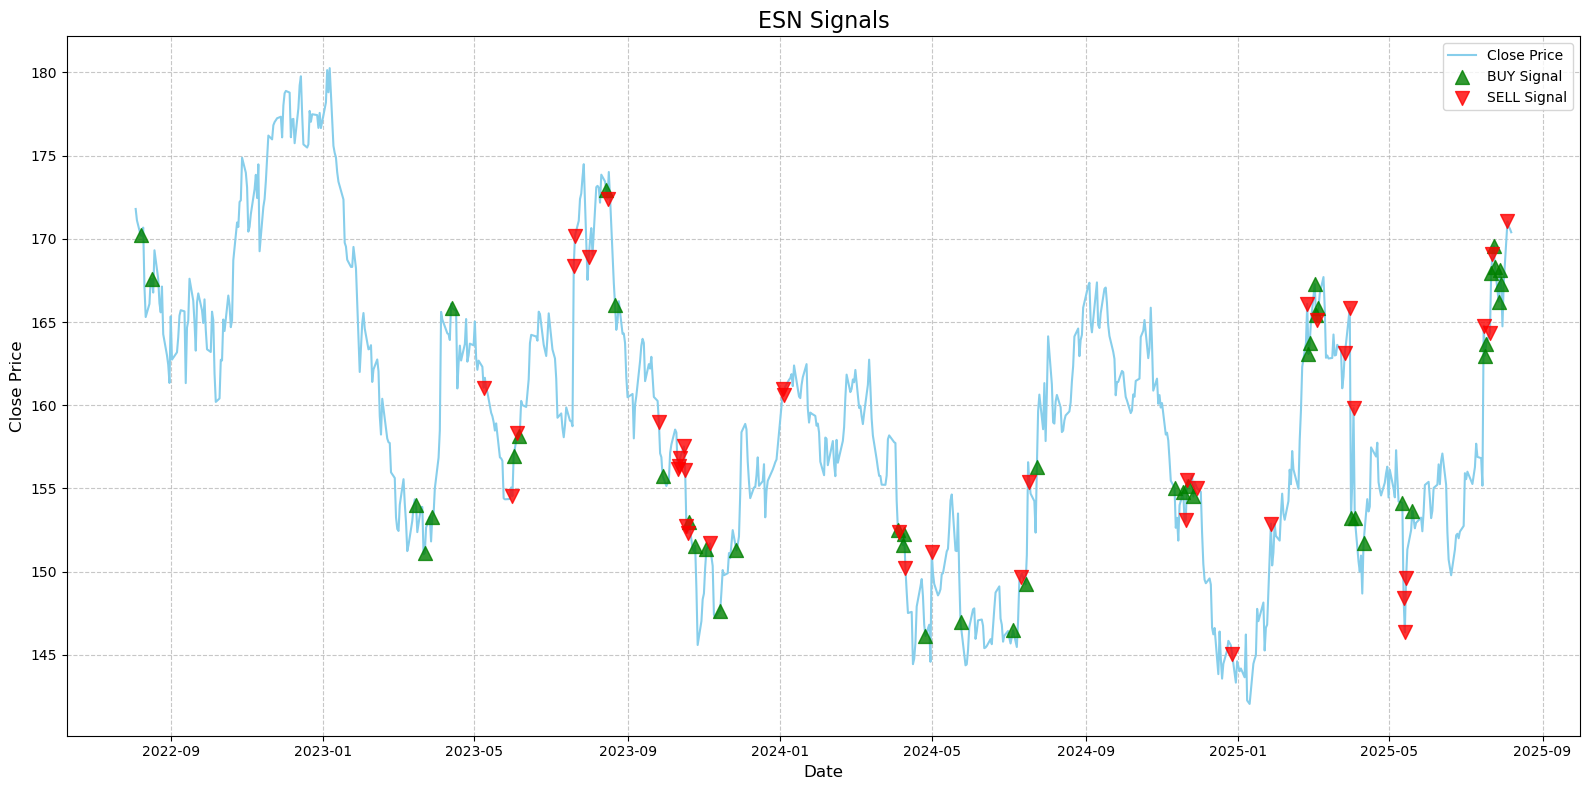

In [42]:
plot_esn_signals(test_df, signals)

In [43]:
import ESN_GA
from ESN_GA import run_genetic_algorithm, perform_final_backtest, PARAM_RANGES
importlib.reload(ESN_GA)

<module 'ESN_GA' from '/Users/munminjung/Capstone/ESN_GA.py'>

In [44]:
best_params_ga, ga_log = run_genetic_algorithm(
    train_df_ga=train_df,
    test_df_ga=test_df,
    technical_signals_list=Technical_Signals,
    pop_size=30,
    num_generations=15,
    random_seed=42
)

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

gen	nevals	avg     	std    	min  	max    
0  	30    	-24.6528	33.4366	-79.9	43.6012


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

1  	25    	0.941849	23.0481	-73.784	43.6012


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

2  	23    	11.4883 	16.1874	-13.5934	43.6012


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

3  	28    	11.6645 	12.4764	-9.20662	34.7111


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

4  	27    	9.31588 	15.4927	-46.5061	36.0889


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

5  	19    	16.4505 	11.1475	-13.7294	36.0889


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

6  	21    	20.6717 	10.6793	-9.21804	36.0889


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

7  	30    	11.4657 	12.816 	-14.5382	37.7032


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

8  	21    	19.8002 	11.5447	-9.42125	37.7032


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

9  	27    	15.9796 	12.5067	-6.23141	37.7032


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

10 	25    	19.9853 	13.2916	-10.1191	52.0398


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

11 	20    	24.982  	13.9036	-5.76381	62.5086


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

12 	23    	23.1483 	13.5154	-14.5224	46.7505


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

13 	22    	21.9476 	15.2486	-14.5224	46.7505


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

14 	25    	20.3059 	16.286 	-14.6026	46.7505


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]

15 	22    	22.2094 	14.2388	-16.4962	46.7505

GA 최적화 완료 - 최적 하이퍼파라미터: [284.1737028642411, 1.0802995197731415, -0.13873924722663877, 0.38999192793368254]
GA 최적화 완료 - 최고 Return [%]: 62.5086


In [45]:
print(best_params_ga)

[284.1737028642411, 1.0802995197731415, -0.13873924722663877, 0.38999192793368254]


In [46]:
final_backtest_stats, final_signals = perform_final_backtest(
    train_df=train_df,
    test_df=test_df,
    best_params=best_params_ga,
    technical_signals_list=Technical_Signals,
    random_state=42
)


--- 최적화된 파라미터로 최종 ESN 학습 및 백테스팅 ---
  n_reservoir: 284
  spectral_radius: 1.0803
  sparsity: 0.0100
  signal_threshold: 0.3900


Backtest.run:   0%|          | 0/754 [00:00<?, ?bar/s]


최종 백테스팅 결과 (최적화된 파라미터):
Start                     2022-08-04 00:00:00
End                       2025-08-07 00:00:00
Duration                   1099 days 00:00:00
Exposure Time [%]                    42.64901
Equity Final [$]                  16250.86113
Equity Peak [$]                   16261.64101
Commissions [$]                     845.23186
Return [%]                           62.50861
Buy & Hold Return [%]                -0.81494
Return (Ann.) [%]                    17.59402
Volatility (Ann.) [%]                13.06323
CAGR [%]                             11.77735
Sharpe Ratio                          1.34684
Sortino Ratio                         2.81918
Calmar Ratio                          1.28923
Alpha [%]                            62.82071
Beta                                  0.38297
Max. Drawdown [%]                   -13.64697
Avg. Drawdown [%]                    -1.98251
Max. Drawdown Duration      280 days 00:00:00
Avg. Drawdown Duration       27 days 00:00:00
# Trades 

In [47]:
def plot_signals(original_df: pd.DataFrame, signals_df: pd.DataFrame, title: str = "ESN Signals with CPM Points"):
    plt.figure(figsize=(16, 8))
    plt.plot(original_df.index, original_df['Close'], label='Close Price', color='skyblue', linewidth=1.5)

    # ESN 예측 매수 신호 (BUY) 표시
    buy_signals = signals_df[signals_df['Predicted_Signals'] == -1]
    plt.scatter(buy_signals.index, buy_signals['Close'], # <-- 'Index' 대신 'buy_signals.index' 사용
                marker='^', color='green', s=100, label='ESN BUY Signal', alpha=0.8, zorder=5)

    # ESN 예측 매도 신호 (SELL) 표시
    sell_signals = signals_df[signals_df['Predicted_Signals'] == 1]
    plt.scatter(sell_signals.index, sell_signals['Close'], # <-- 'Index' 대신 'sell_signals.index' 사용
                marker='v', color='red', s=100, label='ESN SELL Signal', alpha=0.8, zorder=5)

    # --- CPM Point Type (-1: BUY, 1: SELL) 표시 추가 ---
    if 'cpm_point_type' in original_df.columns:
        cpm_buy_points = original_df[original_df['cpm_point_type'] == -1]
        cpm_sell_points = original_df[original_df['cpm_point_type'] == 1]

        # CPM BUY 포인트 (예: 마름모, 파란색)
        plt.scatter(cpm_buy_points.index, cpm_buy_points['Close'],
                    marker='D', color='blue', s=120, label='CPM BUY Point', alpha=0.6, zorder=4)

        # CPM SELL 포인트 (예: 마름모, 주황색)
        plt.scatter(cpm_sell_points.index, cpm_sell_points['Close'],
                    marker='D', color='orange', s=120, label='CPM SELL Point', alpha=0.6, zorder=4)
    else:
        print("경고: 'cpm_point_type' 컬럼이 original_df에 없어 CPM 포인트를 표시할 수 없습니다.")

    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Close Price', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

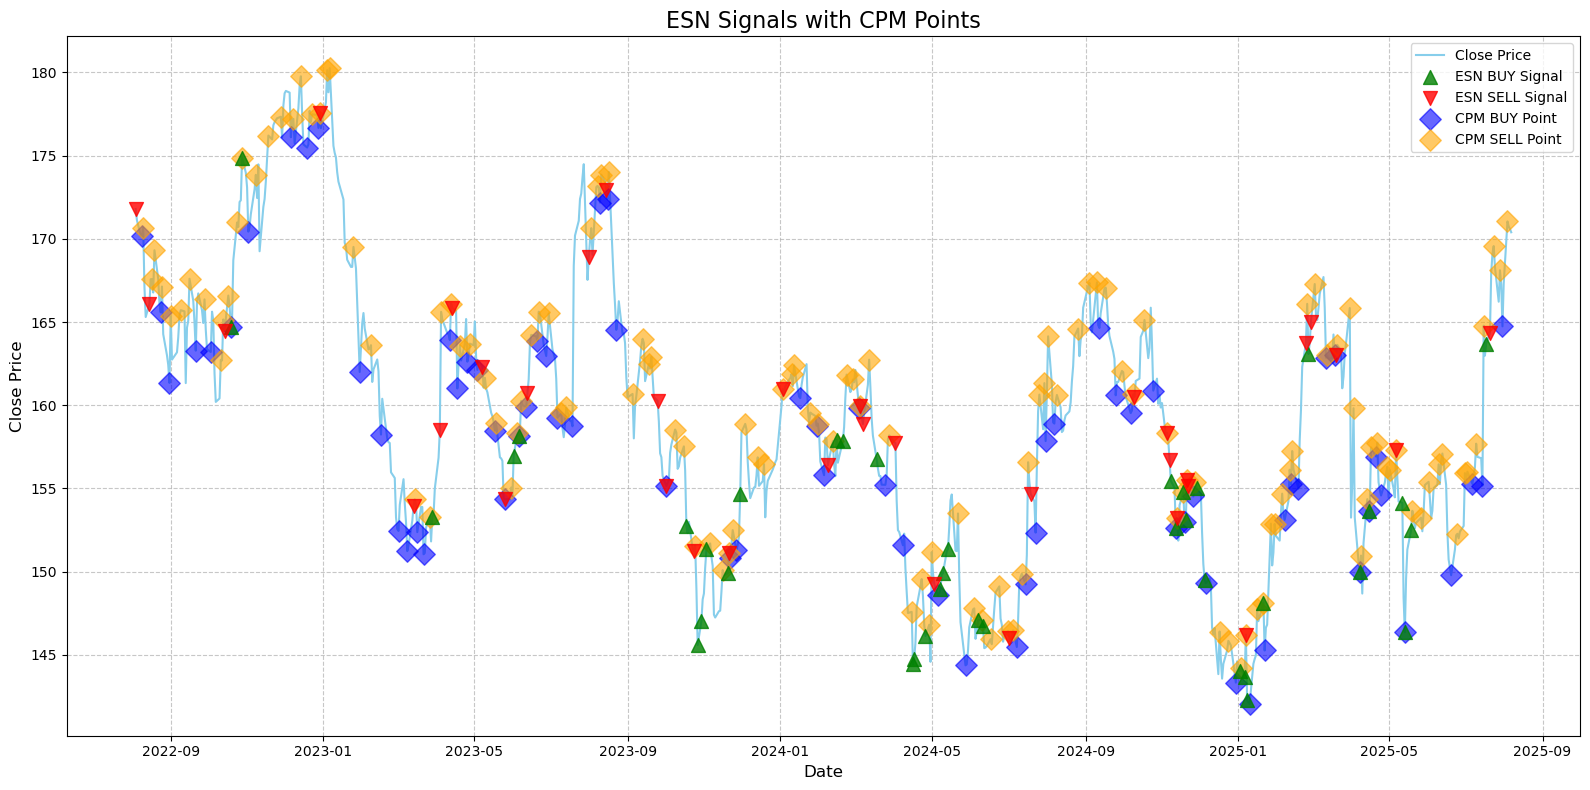

In [48]:
plot_signals(test_df, final_signals)